In [66]:
# Stdlib
from IPython.display import display, Latex

# Scientific computing
import numpy as np

# Network science
import networkx as nx

# Data handling and vis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Project source

# Miscellaneous

# Preprocessing

## Loading and concatenating dataframes

### ex23

In [67]:
# Small datasets
metadata_ex23 = {
    "PROJECT_ID": "EMB_ex23-verify",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v1.1",
    "DATE": "20230220"
}
TAG_ex23 = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata_ex23)

df_ex23 = pd.read_csv(f"../../results/dataframes/dataframe_{TAG_ex23}.csv", index_col="_UID")


# Concatenate larger datasets
metadata_ex23.update({
    "CURRENT_VERSION": "v1.1.1"
})
TAG_ex23 = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata_ex23)

df_ex23 = pd.concat([df_ex23, pd.read_csv(f"../../results/dataframes/dataframe_{TAG_ex23}.csv", index_col="_UID")])

### ex24

In [68]:
# Small datasets
metadata_ex24 = {
    "PROJECT_ID": "EMB_ex24-verify",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v1.0",
    "DATE": "20230220"
}
TAG_ex24 = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata_ex24)

df_ex24 = pd.read_csv(f"../../results/dataframes/dataframe_{TAG_ex24}.csv", index_col="_UID")


# Concatenate larger datasets
# * Not ready yet!
# metadata_ex24.update({
#     "CURRENT_VERSION": "v1.1"
# })
# TAG_ex24 = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata_ex24)

# df_ex24 = pd.concate([df_ex24, pd.read_csv(f"../../results/dataframes/dataframe_{TAG_ex24}.csv", index_col="_UID")])

### ex25

In [69]:
# Small datasets
metadata_ex25 = {
    "PROJECT_ID": "EMB_ex25-verify",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v1.0",
    "DATE": "20230221"
}
TAG_ex25 = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata_ex25)

df_ex25 = pd.read_csv(f"../../results/dataframes/dataframe_{TAG_ex25}.csv", index_col="_UID")

## Concatenating

In [70]:
# Adding identifiers
df_ex23["experiment"] = ["ex23"] * len(df_ex23)
df_ex24["experiment"] = ["ex24"] * len(df_ex24)
df_ex25["experiment"] = ["ex25"] * len(df_ex25)

In [71]:
# Concatenating across experiments
df = pd.concat([df_ex23, df_ex24, df_ex25])

## Pruning

In [72]:
df = df.drop(columns=["intercept", "coef"])

## Reindexing and renaming

In [73]:
# Reset index after concatenations
df = df.reset_index()
df = df.drop(columns=["_UID"])

In [74]:
# Rename layers
df = df.rename(columns={"l1": "alpha", "l2": "beta"})

In [75]:
df.describe()

,alpha,beta,theta,accuracy,auroc
count,1350.000000,1350.000000,1350.000000,1275.000000,1350.000000
mean,1.629630,3.259259,0.513889,0.555703,0.397854
std,1.024103,1.350194,0.296570,0.269149,0.444036
min,1.000000,2.000000,0.050000,0.000000,-1.000000
25%,1.000000,2.000000,0.261111,0.400858,0.206793
50%,1.000000,3.000000,0.511111,0.595547,0.492789
75%,2.000000,3.000000,0.788889,0.790935,0.591339
max,6.000000,7.000000,1.000000,1.000000,1.000000


# Analysis

## N2V distance-based likelihood

<Figure size 640x480 with 0 Axes>

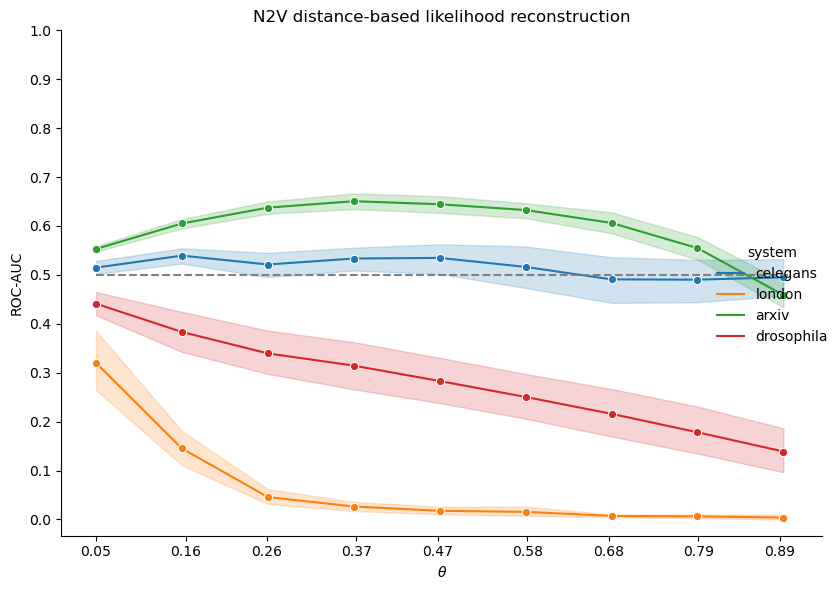

In [83]:
# Instantiate figure, subset relevant data
plt.figure()
df_ = df.query("experiment == 'ex23' and theta != 1.0")

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="auroc",
    hue="system",
    marker="o",
    height=6, aspect=1.2
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [np.float(np.format_float_scientific(x, precision=1)) for x in set(df_["theta"])],
    rotation=0
)
plt.xlabel("$\\theta$")

plt.yticks(np.linspace(0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("N2V distance-based likelihood reconstruction")

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/line_auroc-pfi_N2V-distance-likelihood.png", facecolor="white", transparent=False)

## N2V Logistic Regression

### With component biases

<Figure size 640x480 with 0 Axes>

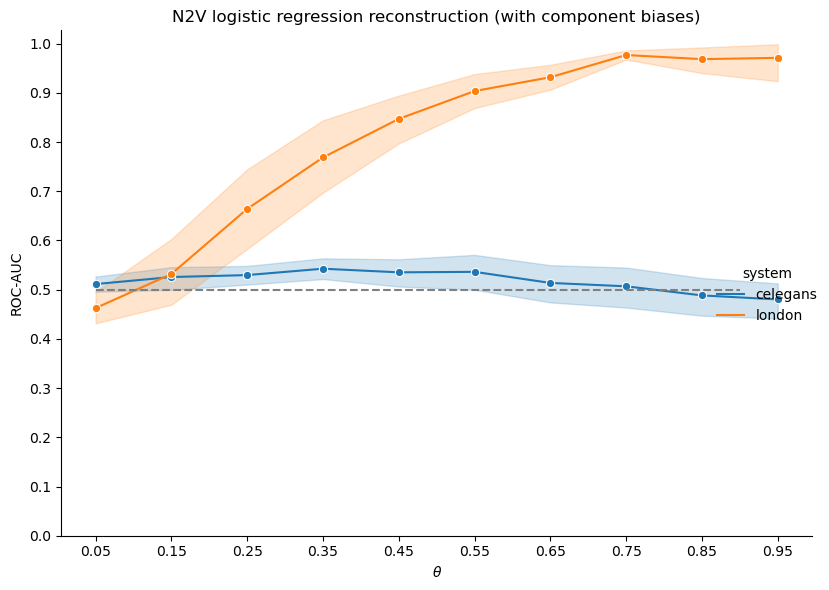

In [84]:
# Instantiate figure, subset relevant data
plt.figure()
df_ = df.query("experiment == 'ex24' and theta != 1.0 and auroc != -1.0")

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="auroc",
    hue="system",
    marker="o",
    height=6, aspect=1.2
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [np.float(np.format_float_scientific(x, precision=1)) for x in set(df_["theta"])],
    rotation=0
)
plt.xlabel("$\\theta$")

plt.yticks(np.linspace(0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("N2V logistic regression reconstruction (with component biases)")

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-component-bias.png", facecolor="white", transparent=False)

### Without component biases

<Figure size 640x480 with 0 Axes>

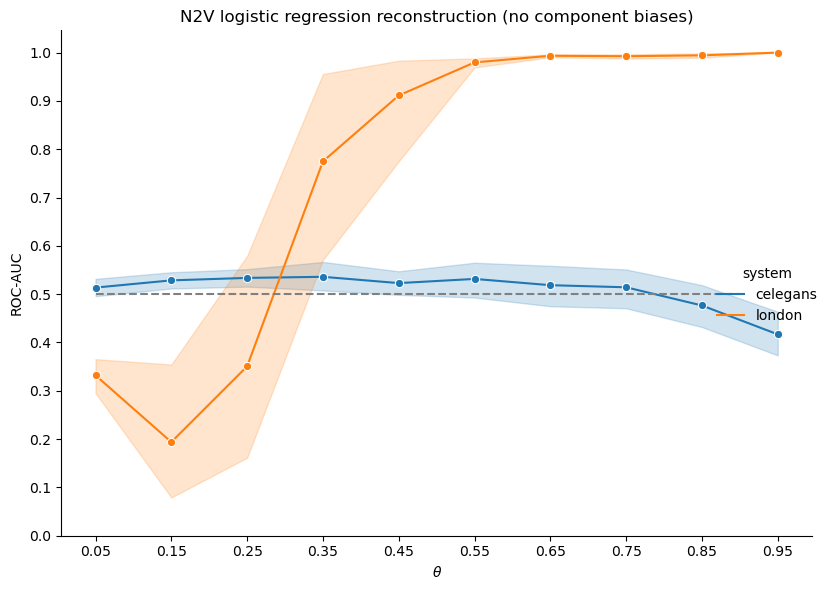

In [85]:
# Instantiate figure, subset relevant data
plt.figure()
df_ = df.query("experiment == 'ex25' and theta != 1.0 and auroc != -1.0")

# Plotting data
sns.relplot(
    data=df_, kind="line",
    x="theta", y="auroc",
    hue="system",
    marker="o",
    height=6, aspect=1.2
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [np.float(np.format_float_scientific(x, precision=1)) for x in set(df_["theta"])],
    rotation=0
)
plt.xlabel("$\\theta$")

plt.yticks(np.linspace(0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("N2V logistic regression reconstruction (no component biases)")

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg.png", facecolor="white", transparent=False)